https://pyscience.wordpress.com/2014/09/08/dicom-in-python-importing-medical-image-data-into-numpy-with-pydicom-and-vtk/

In [6]:
%matplotlib inline
import dicom
import os
import numpy
from matplotlib import pyplot, cm
import glob
import fnmatch


In [7]:
PathDicom = "./data/CQ500CT1 CQ500CT1/Unknown Study/CT 2.55mm/"
lstFilesDCM = []  # create an empty list
#for dirName, subdirList, fileList in os.walk(PathDicom):
pattern = "*.dcm"
lstFilesDCM = fnmatch.filter(os.listdir(PathDicom), pattern)
for filename in lstFilesDCM:
    print (filename)
    # Get ref file
    RefDs = dicom.read_file(PathDicom+filename)
    # Load dimensions based on the number of rows, columns, and slices (along the Z axis)
    print ("RefDs.Rows:", int(RefDs.Rows))
    print ("RefDs.Columns:", int(RefDs.Columns)) 
    print ("len(lstFilesDCM):", len(lstFilesDCM))
    ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))
    print ("type(ConstPixelDims):", type(ConstPixelDims), len(ConstPixelDims), 
           type(ConstPixelDims[0]), ConstPixelDims[1], ConstPixelDims[2])

    # Load spacing values (in mm)
    ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))
    print ("type(ConstPixelSpacing):", type(ConstPixelSpacing), len(ConstPixelSpacing), 
           type(ConstPixelSpacing[0]), ConstPixelSpacing[1], ConstPixelSpacing[2])
    x = numpy.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
    y = numpy.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
    z = numpy.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])
    print("x:\n", x)
    print("y:\n", y)
    print("z:", z)
    break



CT000021.dcm
RefDs.Rows: 512
RefDs.Columns: 512
len(lstFilesDCM): 36
type(ConstPixelDims): <class 'tuple'> 3 <class 'int'> 512 36
type(ConstPixelSpacing): <class 'tuple'> 3 <class 'float'> 0.564453 5.0
x:
 [  0.         0.564453   1.128906   1.693359   2.257812   2.822265
   3.386718   3.951171   4.515624   5.080077   5.64453    6.208983
   6.773436   7.337889   7.902342   8.466795   9.031248   9.595701
  10.160154  10.724607  11.28906   11.853513  12.417966  12.982419
  13.546872  14.111325  14.675778  15.240231  15.804684  16.369137
  16.93359   17.498043  18.062496  18.626949  19.191402  19.755855
  20.320308  20.884761  21.449214  22.013667  22.57812   23.142573
  23.707026  24.271479  24.835932  25.400385  25.964838  26.529291
  27.093744  27.658197  28.22265   28.787103  29.351556  29.916009
  30.480462  31.044915  31.609368  32.173821  32.738274  33.302727
  33.86718   34.431633  34.996086  35.560539  36.124992  36.689445
  37.253898  37.818351  38.382804  38.947257  39.51171   

In [8]:
# The array is sized based on 'ConstPixelDims'
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
print (ArrayDicom.shape)

(512, 512, 36)


In [9]:
# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = dicom.read_file(PathDicom+filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array  

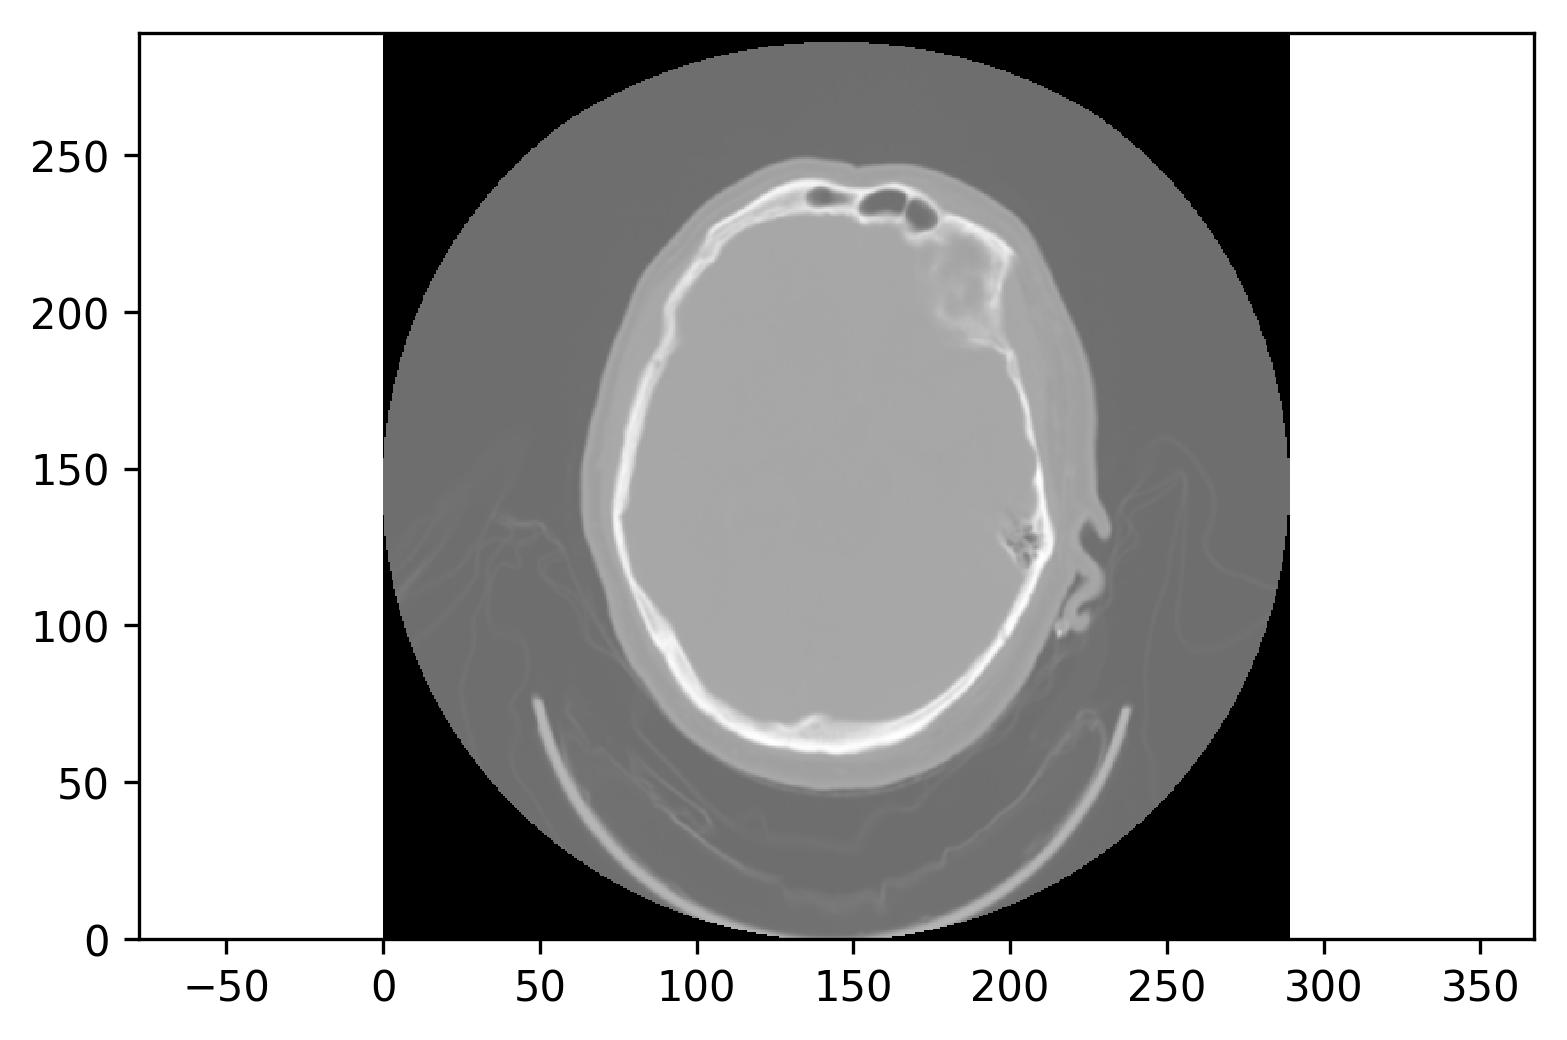

In [10]:
pyplot.figure(dpi=300)
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.set_cmap(pyplot.gray())
pyplot.pcolormesh(x, y, numpy.flipud(ArrayDicom[:, :, 0]))